# New Library Using Plotnine
By: Deniza Robinson

In [54]:
from plotnine import ggplot, aes, geom_line, theme_minimal
from plotnine.data import mpg
import pandas as pd
from pymongo import MongoClient
import pandas as pd
import numpy as np
import requests


In [55]:
df_train = pd.read_csv(r"Resources/cleaned_data.csv", low_memory=False)

Column 1 & 2 

In [56]:

occupations = df_train.occupation.unique()
occupations

array(['Scientist', nan, 'Teacher', 'Engineer', 'Entrepreneur', 'Lawyer',
       'Media_Manager', 'Doctor', 'Journalist', 'Manager', 'Mechanic',
       'Writer', 'Accountant', 'Architect', 'Musician', 'Developer'],
      dtype=object)

Column 1

In [57]:
# Create DataFrame for first quarter & second quarter; January - June
# Q1: January - March
# Q2: April - June

# Define the months you want to keep
months_to_keep = ['January', 'February', 'March', 'April', 'May', 'June']
# Filter the DataFrame
filtered_df = df_train[df_train['month'].isin(months_to_keep)]
filtered_df

,customer_id,month,name,age,occupation,annual_income,num_bank_accounts,num_of_loans,type_of_loans,delay_from_due_date,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,April,Aaron Maashoh,24,Scientist,19114.12,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.38,22 Years and 4 Months,No,49.57,199.46,Low_spent_Small_value_payments,223.45,Good
2,CUS_0x21b1,January,Rick Rothackerj,28,NaN,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,24.46,26 Years and 7 Months,No,18.82,104.29,Low_spent_Small_value_payments,470.69,Standard
3,CUS_0x21b1,February,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,7,...,Good,605.03,38.55,26 Years and 8 Months,No,18.82,40.39,High_spent_Large_value_payments,484.59,Good
4,CUS_0x21b1,April,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,39.18,26 Years and 10 Months,No,18.82,99.31,Low_spent_Medium_value_payments,465.68,Good
5,CUS_0x21b1,May,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,34.98,26 Years and 11 Months,No,18.82,130.12,Low_spent_Small_value_payments,444.87,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50106,CUS_0xaf61,June,Chris Wickhamm,50,Writer,37188.10,1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",5,...,Good,620.64,37.75,30 Years and 2 Months,NM,84.21,147.34,Low_spent_Small_value_payments,368.15,Good
50107,CUS_0x8600,January,Sarah McBridec,4975,Architect,20002.88,10,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",35,...,Bad,3571.70,22.90,5 Years and 8 Months,Yes,60.96,43.37,High_spent_Large_value_payments,328.66,Poor
50108,CUS_0x8600,February,Sarah McBridec,4975,Architect,20002.88,10,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.70,39.77,5 Years and 9 Months,Yes,12112.00,148.28,Low_spent_Small_value_payments,273.75,Poor
50109,CUS_0x8600,March,Sarah McBridec,4975,Architect,20002.88,10,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.70,24.71,5 Years and 10 Months,Yes,60.96,76.28,Low_spent_Small_value_payments,345.74,Poor


Column 3

In [58]:
# Create Dataframe for third quarterly & fourth quarterly; July - December
# Q3: July - September
# Q4: October - December

# Define the months you want to keep (July to December)
months_to_keep = ['July', 'August', 'September', 'October', 'November', 'December']
# Filter the DataFrame
filtered_df_july_to_dec = df_train[df_train['month'].isin(months_to_keep)]
filtered_df_july_to_dec

,customer_id,month,name,age,occupation,annual_income,num_bank_accounts,num_of_loans,type_of_loans,delay_from_due_date,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
1,CUS_0xd40,July,Aaron Maashoh,24,Scientist,19114.12,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.54,22 Years and 7 Months,No,49.57,178.34,Low_spent_Small_value_payments,244.57,Good
7,CUS_0x21b1,July,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,31.13,27 Years and 1 Months,NM,18.82,70.10,High_spent_Medium_value_payments,464.88,Good
8,CUS_0x21b1,August,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,32.93,27 Years and 2 Months,No,18.82,218.90,Low_spent_Small_value_payments,356.08,Good
12,CUS_0x2dbc,July,Langep,35,Engineer,143162.64,1,3,"Auto Loan, Auto Loan, and Not Specified",8,...,Good,1303.01,38.07,18 Years and 3 Months,No,246.99,263.17,High_spent_Small_value_payments,968.56,Standard
13,CUS_0x2dbc,August,Langep,35,Engineer,143162.64,1,3,"Auto Loan, Auto Loan, and Not Specified",8,...,Good,1303.01,38.37,18 Years and 4 Months,No,246.99,10000.00,High_spent_Small_value_payments,895.49,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50084,CUS_0x2654,July,enj,38,Media_Manager,139664.96,3,4,"Credit-Builder Loan, Credit-Builder Loan, Stud...",14,...,Standard,365.66,32.10,30 Years and 1 Months,Yes,423.73,378.29,High_spent_Small_value_payments,635.75,Good
50089,CUS_0xb11c,August,Yinka Adegokej,39,NaN,15319.65,6,4,"Home Equity Loan, Auto Loan, Auto Loan, and Au...",54,...,Bad,1453.61,34.56,11 Years and 4 Months,Yes,28.18,191.88,Low_spent_Small_value_payments,216.00,Poor
50092,CUS_0x51b3,August,Ryana,33,Media_Manager,59146.36,3,1,Personal Loan,8,...,Good,418.03,27.68,20 Years and 8 Months,No,26.78,10000.00,Low_spent_Large_value_payments,389.49,Standard
50097,CUS_0x2084,July,Ryanl,21,Architect,38321.39,4,4,"Student Loan, Debt Consolidation Loan, Student...",11,...,Good,678.57,28.36,17 Years and 5 Months,No,362.07,182.07,Low_spent_Large_value_payments,309.11,Standard


In [59]:
pip install plotnine pandas

Note: you may need to restart the kernel to use updated packages.


In [60]:
import pandas as pd

data = {
    'Occupations': ['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Lawyer',
       'Media_Manager', 'Doctor', 'Manager', 'Mechanic',
        'Accountant', 'Architect', 'Developer'],
     # Repeat the 'occupations' value
    'Month': ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December'],
    'Credit Score': ['Poor'] * 6 + ['Standard'] * 3 + ['Good'] * 3  # Adjust as needed
}

df = pd.DataFrame(data)
df


,Occupations,Month,Credit Score
0,Scientist,January,Poor
1,Teacher,February,Poor
2,Engineer,March,Poor
3,Entrepreneur,April,Poor
4,Lawyer,May,Poor
5,Media_Manager,June,Poor
6,Doctor,July,Standard
7,Manager,August,Standard
8,Mechanic,September,Standard
9,Accountant,October,Good


/Users/denizarobinson/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/pretty.py:700: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/denizarobinson/opt/anaconda3/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


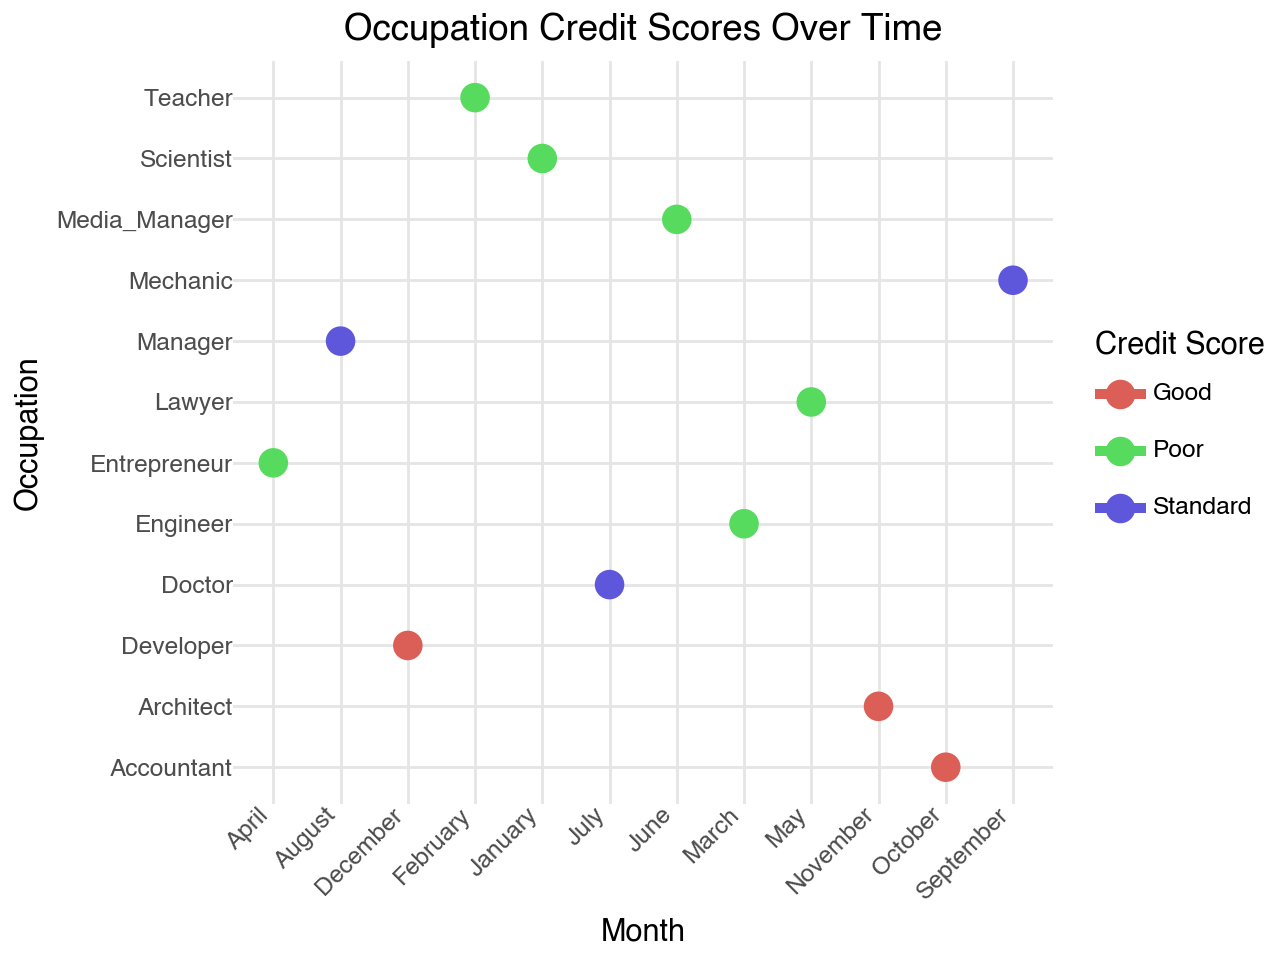

(<Figure Size: (640 x 480)>,)

In [61]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal, theme, element_text

# Plot using Plotnine
plot = (
    ggplot(df, aes(x='Month', y='Occupations', group='Occupations', color='Credit Score')) +
    geom_line(size=2) +   # Create lines connecting data points
    geom_point(size=5) +  # Highlight each data point
    labs(title="Occupation Credit Scores Over Time",
         x="Month", y="Occupation") +
    theme_minimal() +
    theme(legend_position='right',
          axis_text_x=element_text(rotation=45, hjust=1)),  # Rotate month names for better readability
          
)

# Display the plot
plot

In [62]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal, theme, element_text, scale_color_manual

# Data setup
data = {
    'Occupations': ['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Lawyer',
                    'Media_Manager', 'Doctor', 'Manager', 'Mechanic',
                    'Accountant', 'Architect', 'Developer'],
    'Month': ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December'],
    'Credit Score': ['Poor'] * 6 + ['Standard'] * 3 + ['Good'] * 3
}

df = pd.DataFrame(data)

# Customize colors to make it more website-friendly
color_palette = {
    'Poor': '#FF6347',      # Red color for Poor
    'Standard': '#4682B4',  # Blue color for Standard
    'Good': '#32CD32'       # Green color for Good
}

# Plot using Plotnine with enhanced styling
plot = (
    ggplot(df, aes(x='Month', y='Occupations', group='Occupations', color='Credit Score')) +
    geom_line(size=2) +   # Create lines connecting data points
    geom_point(size=5) +  # Highlight each data point
    labs(title="Occupation Credit Scores Over Time",
         x="Month", y="Occupation") +
    scale_color_manual(values=color_palette) +  # Apply the custom color palette
    theme_minimal() +  # Use a minimal theme for a cleaner look
    theme(
        legend_position='right',
        axis_text_x=element_text(rotation=45, hjust=1, size=10, color='black'),
        axis_text_y=element_text(size=10, color='black'),
        plot_title=element_text(color="black", size=16, weight='bold'),
        panel_grid_major=element_text(color="lightgray"),  # Light gray gridlines
        panel_background=element_text(color='black')  # White background
        
    
    )
)

# Display the plot
fig = plot.draw()


# Save the figure using matplotlib's savefig
fig.savefig("occupation_credit_scores.png", dpi=300)



/Users/denizarobinson/opt/anaconda3/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
